# Spotify Track
### (analysis and recommendation)
A dataset of Spotify songs with different genres and their audio features

https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset/code

This is a dataset of Spotify tracks over a range of 114 different track_genre.
Each track has some audio features associated with it. The data is in CSV
format which is tabular and can be loaded quickly.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from collections import OrderedDict, defaultdict

In [2]:
df = pd.read_csv("dataset.csv",header=0,index_col='Unnamed: 0')
data = df.drop(['album_name','track_id','artists','track_name','explicit'],axis=1)#.astype(float)
data.head()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,73,230666,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,55,149610,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,57,210826,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,71,201933,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,82,198853,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [3]:
data.shape

(114000, 15)

## Big picture about this data

In [4]:
data.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [5]:
print(data[data['track_genre'] == 'acoustic'].shape)
print(data[data['track_genre'] == 'afrobeat'].shape)
print(data[data['track_genre'] == 'alternative'].shape)
print(data.shape)

(1000, 15)
(1000, 15)
(1000, 15)
(114000, 15)


### Code to list all track_genre
tip: Looking at the dataframe we know that after 1000 lines the track_genre is different.

In [6]:
# Code to list all track_genre
y = 'acoustic'
list_names = ['acoustic']
for i in range(0,len(data['track_genre'])):
    if y != data['track_genre'][i]:
        list_names.append(y)
    if i == len(data['track_genre'])-1:
        list_names.append(y)
    y = data['track_genre'][i]

In [7]:
list_names[1:]

['acoustic',
 'afrobeat',
 'alt-rock',
 'alternative',
 'ambient',
 'anime',
 'black-metal',
 'bluegrass',
 'blues',
 'brazil',
 'breakbeat',
 'british',
 'cantopop',
 'chicago-house',
 'children',
 'chill',
 'classical',
 'club',
 'comedy',
 'country',
 'dance',
 'dancehall',
 'death-metal',
 'deep-house',
 'detroit-techno',
 'disco',
 'disney',
 'drum-and-bass',
 'dub',
 'dubstep',
 'edm',
 'electro',
 'electronic',
 'emo',
 'folk',
 'forro',
 'french',
 'funk',
 'garage',
 'german',
 'gospel',
 'goth',
 'grindcore',
 'groove',
 'grunge',
 'guitar',
 'happy',
 'hard-rock',
 'hardcore',
 'hardstyle',
 'heavy-metal',
 'hip-hop',
 'honky-tonk',
 'house',
 'idm',
 'indian',
 'indie-pop',
 'indie',
 'industrial',
 'iranian',
 'j-dance',
 'j-idol',
 'j-pop',
 'j-rock',
 'jazz',
 'k-pop',
 'kids',
 'latin',
 'latino',
 'malay',
 'mandopop',
 'metal',
 'metalcore',
 'minimal-techno',
 'mpb',
 'new-age',
 'opera',
 'pagode',
 'party',
 'piano',
 'pop-film',
 'pop',
 'power-pop',
 'progressive

Total track_genre number 

In [8]:
x = 0
list_mean = []
for item in list_names[1:]:
    x= df[df['track_genre']==item]['popularity'].mean()
    list_mean.append(x)
len(list_mean)

114

Next: Mean value of popularity for each track_genre

In [9]:
df_gener = pd.DataFrame({'track_genre':list_names[1:], 'popularity':list_mean})
df_gener= df_gener.sort_values(by=['popularity'],ascending=False).reset_index(drop=True)
df_gener.iloc[:20,:]

,track_genre,popularity
0,pop-film,59.283
1,k-pop,56.896
2,chill,53.651
3,sad,52.379
4,grunge,49.594
5,indian,49.539
6,anime,48.772
7,emo,48.128
8,sertanejo,47.866
9,pop,47.576


Below: 10 most popular track_genre

[Text(0, 0.5, 'avg_popularity')]

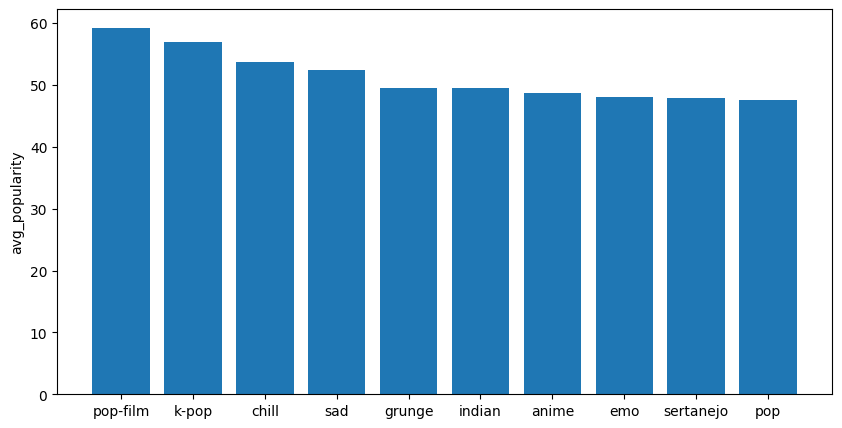

In [10]:

fig, (ax1) = plt.subplots(1, 1, figsize=(10, 5))

ax1.bar(df_gener['track_genre'][:10], df_gener['popularity'][:10])

#ax2.bar(df_gener['track_genre'][104:114], df_gener['popularity'][104:114])

ax1.set( ylabel='avg_popularity')


In [11]:
list_names[len(list_names)-1]

'world-music'

In [12]:
data['track_genre'][114000-1]

'world-music'

Below: Heatmap of correlation for mpb

/tmp/ipykernel_4498/2213289515.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data[data['track_genre']=='mpb'].corr()


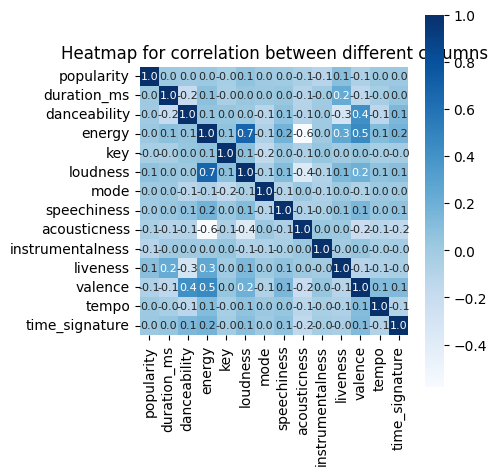

In [13]:
import seaborn as sns

plt.figure(figsize=(5,5))
correlation = data[data['track_genre']=='mpb'].corr()
sns.heatmap(correlation, cbar=True, square=True, fmt=".1f", annot=True, annot_kws={'size':8}, cmap='Blues')
plt.title("Heatmap for correlation between different columns")
plt.tight_layout()
plt.show()

# Recommendation

In [14]:
df = pd.read_csv("dataset.csv",header=0,index_col='Unnamed: 0')
df = df.drop(['album_name','track_id','artists','explicit','time_signature','tempo'],axis=1)#.astype(float)
#df['Good_Bad'] = df['popularity'].apply(lambda x: 0 if x <= 60 else 1)
#df =df.drop(columns=['popularity'])
df[df['track_genre']=='mpb']

,track_name,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,track_genre
74000,Tuyo (Narcos Theme) [Extended Version] - A Net...,66,151565,0.765,0.497,1,-7.806,0,0.0402,0.49200,0.366000,0.1430,0.457,mpb
74001,Tuyo (Narcos Theme) - A Netflix Original Serie...,65,89293,0.720,0.422,1,-13.338,0,0.0690,0.47400,0.084700,0.1550,0.546,mpb
74002,Azul (Ao Vivo),49,259066,0.632,0.651,7,-8.658,0,0.0401,0.75600,0.000004,0.7260,0.652,mpb
74003,Apaga a Luz (feat. Olívia),49,216446,0.610,0.420,4,-10.889,0,0.0462,0.81500,0.000000,0.1230,0.553,mpb
74004,Pareço um Menino,50,273906,0.580,0.330,7,-13.703,1,0.0295,0.59600,0.000001,0.0849,0.373,mpb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,Ando Só,40,234506,0.550,0.906,9,-6.611,1,0.0380,0.00417,0.000018,0.4390,0.664,mpb
74996,Nada por Mim,37,103413,0.433,0.225,7,-12.011,1,0.0537,0.88200,0.001250,0.1270,0.509,mpb
74997,Sete Desejos - Ao Vivo,39,244586,0.427,0.564,2,-10.231,1,0.0324,0.55800,0.001890,0.7970,0.474,mpb
74998,Do Jeito Que A Vida Quer/Como Dizia O Mestre -...,39,366760,0.434,0.777,2,-9.252,0,0.1030,0.53800,0.000000,0.9350,0.405,mpb


In [51]:
df = pd.read_csv("dataset.csv",header=0,index_col='Unnamed: 0')
df = df.drop(['album_name','track_id','artists','explicit','time_signature','tempo'],axis=1)
temp_df = df.drop(columns=['popularity','duration_ms','key','track_name'])
temp_df = temp_df[temp_df['track_genre']=='mpb']
temp_df = temp_df.drop(columns=['track_genre']).reset_index(drop=True)#.reset_index()


#  We will divide each columns by mean() to be able to have a better classification in the following method.
for x in list(temp_df.columns):
    temp_df[x] = temp_df[x]/(temp_df[x].mean())
temp_df

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence
0,1.332548,0.857211,0.856822,0.000000,0.710639,1.169040,23.675669,0.421252,0.821302
1,1.254163,0.727853,1.464040,0.000000,1.219754,1.126270,5.479041,0.456602,0.981249
2,1.100877,1.122826,0.950342,0.000000,0.708871,1.796330,0.000258,2.138666,1.171748
3,1.062555,0.724404,1.195226,0.000000,0.816705,1.936519,0.000000,0.362336,0.993829
4,1.010298,0.569174,1.504104,1.420455,0.521489,1.416154,0.000093,0.250100,0.670340
...,...,...,...,...,...,...,...,...,...
995,0.958041,1.562642,0.725654,1.420455,0.671748,0.009908,0.001145,1.293216,1.193314
996,0.754240,0.388073,1.318382,1.420455,0.949287,2.095718,0.080860,0.374119,0.914754
997,0.743788,0.972771,1.123001,1.420455,0.572754,1.325862,0.122260,2.347820,0.851853
998,0.755982,1.340147,1.015542,0.000000,1.820792,1.278340,0.000000,2.754343,0.727849


In [16]:
from sklearn.metrics.pairwise import cosine_similarity

cs = cosine_similarity(temp_df)
print(cs.shape)
print(cs)

(1000, 1000)
[[1.         0.92764117 0.08974292 ... 0.10820353 0.07841093 0.08176741]
 [0.92764117 1.         0.38539477 ... 0.3598583  0.36060947 0.37954156]
 [0.08974292 0.38539477 1.         ... 0.9007118  0.92996596 0.6903211 ]
 ...
 [0.10820353 0.3598583  0.9007118  ... 1.         0.87309959 0.8073616 ]
 [0.07841093 0.36060947 0.92996596 ... 0.87309959 1.         0.63076475]
 [0.08176741 0.37954156 0.6903211  ... 0.8073616  0.63076475 1.        ]]


In [53]:
maxElement = np.argmax(cs[0][1:])
maxElement+1

983

In [63]:
df = pd.read_csv("dataset.csv",header=0,index_col='Unnamed: 0')
df = df.drop(['album_name','track_id','artists','explicit','time_signature','tempo','danceability'],axis=1)
temp_n = df.drop(columns=['popularity','duration_ms','key','speechiness','mode','loudness'])
temp_n = temp_n[temp_n['track_genre']=='mpb']
temp_n = temp_n.drop(columns=['track_genre']).reset_index(drop=True)#.reset_index()
print(temp_n.iloc[0,0])
print(temp_n[980:990])

Tuyo (Narcos Theme) [Extended Version] - A Netflix Original Series Soundtrack
                        track_name  energy  acousticness  instrumentalness  \
980  De Sampa a São Luis - Ao vivo   0.478        0.7710          0.002330   
981                Flor Do Vidigal   0.641        0.7580          0.000013   
982     Sambinha da Fralda Molhada   0.613        0.6710          0.000030   
983                   Calor da Rua   0.593        0.3020          0.510000   
984                    Amar Alguém   0.259        0.9630          0.000021   
985              Fingi na Hora Rir   0.543        0.0206          0.001740   
986       Por Onde Andei - Ao Vivo   0.330        0.8600          0.000003   
987              Tocando Em Frente   0.450        0.7470          0.003780   
988                    Vela Aberta   0.745        0.0895          0.000009   
989              O Vento e o Tempo   0.563        0.7190          0.003550   

     liveness  valence  
980    0.6950    0.591  
981    0.1040

In [46]:
df = pd.read_csv("/home/maike/Documentos/Documents MAIKE/ICTP/Spoty/dataset.csv",header=0,index_col='Unnamed: 0')
data2 = df.drop(['album_name','track_id','artists','explicit','time_signature','tempo'],axis=1)#.astype(float)
data2= data2[data2['track_genre']=='mpb']#.iloc[:1000,:]
data2 = data2.drop(columns=['track_genre']).reset_index(drop=True)

for x in list(data2.columns):
    if x != 'track_name':
        data2[x] = data2[x]/(data2[x].mean())

data2#.head(10)


,track_name,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence
0,Tuyo (Narcos Theme) [Extended Version] - A Net...,1.617964,0.661231,1.332548,0.857211,0.177999,0.856822,0.000000,0.710639,1.169040,23.675669,0.421252,0.821302
1,Tuyo (Narcos Theme) - A Netflix Original Serie...,1.593450,0.389558,1.254163,0.727853,0.177999,1.464040,0.000000,1.219754,1.126270,5.479041,0.456602,0.981249
2,Azul (Ao Vivo),1.201216,1.130225,1.100877,1.122826,1.245995,0.950342,0.000000,0.708871,1.796330,0.000258,2.138666,1.171748
3,Apaga a Luz (feat. Olívia),1.201216,0.944287,1.062555,0.724404,0.711997,1.195226,0.000000,0.816705,1.936519,0.000000,0.362336,0.993829
4,Pareço um Menino,1.225731,1.194967,1.010298,0.569174,1.245995,1.504104,1.420455,0.521489,1.416154,0.000093,0.250100,0.670340
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ando Só,0.980584,1.023077,0.958041,1.562642,1.601994,0.725654,1.420455,0.671748,0.009908,0.001145,1.293216,1.193314
996,Nada por Mim,0.907041,0.451159,0.754240,0.388073,1.245995,1.318382,1.420455,0.949287,2.095718,0.080860,0.374119,0.914754
997,Sete Desejos - Ao Vivo,0.956070,1.067053,0.743788,0.972771,0.355999,1.123001,1.420455,0.572754,1.325862,0.122260,2.347820,0.851853
998,Do Jeito Que A Vida Quer/Como Dizia O Mestre -...,0.956070,1.600060,0.755982,1.340147,0.355999,1.015542,0.000000,1.820792,1.278340,0.000000,2.754343,0.727849


In [47]:
data_acoustic = data2#.iloc[:1000,:]
#data_acoustic.index
songs_ids = pd.Series(data_acoustic.index, index=data_acoustic['track_name'])
songs_ids[:30]

track_name
Tuyo (Narcos Theme) [Extended Version] - A Netflix Original Series Soundtrack     0
Tuyo (Narcos Theme) - A Netflix Original Series Soundtrack                        1
Azul (Ao Vivo)                                                                    2
Apaga a Luz (feat. Olívia)                                                        3
Pareço um Menino                                                                  4
Amado - Ao Vivo                                                                   5
FESTA JOVEM                                                                       6
Identidade - Ao vivo                                                              7
Tendo A Lua - Ao Vivo                                                             8
Sobre o Tempo                                                                     9
Look To The Sky                                                                  10
Acenda o farol                                                   

In [48]:
def song_recommender(song_id, cs=cs):
    #index of the song using its id
    idx = songs_ids[song_id]
    #get cosine similarity scores for that song, sort them and get top 10 similar
    scores = list(enumerate(cs[idx]))
    sorted_scores = sorted(scores, key= lambda x:x[1], reverse=True)[0:11]
    #get the indexes of top 10 similar songs
    rec_songs_idxs = [i[0] for i in sorted_scores]
    print("\nTop 10 similar songs:\n")
    return data2[['track_name']].iloc[rec_songs_idxs]

In [49]:
candid_id = 'Tuyo (Narcos Theme) [Extended Version] - A Netflix Original Series Soundtrack'
song_recommender(song_id=candid_id)


Top 10 similar songs:



,track_name
0,Tuyo (Narcos Theme) [Extended Version] - A Net...
983,Calor da Rua
555,Goteira
578,Não Venha Pela Metade
529,Amor Sem Barreira
817,Sinal Fechado
580,Bota Pagodão Ponto Net
903,Amor-Perfeito
10,Look To The Sky
681,Pot-Pourri: Amor Estou Sofrendo / Que Nem Iôiô...


 This recommendation list to music 'Sangrando' in track_genre 'mpb' was calculated through of cosine_similarity.